<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/AAI614O_Rawas_Saera_Graded_Assessment_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
pip install ucimlrepo

In [104]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [105]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


*1 - Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?*

In [106]:
# Check the data types of each column
print(X.dtypes)

# Example of expected types based on the metadata
expected_types = {
    'age': 'int64',
    'workclass': 'category',
    'fnlwgt': 'int64',
    'education': 'category',
    'education-num': 'int64',
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'sex': 'category',
    'capital-gain': 'int64',
    'capital-loss': 'int64',
    'hours-per-week': 'int64',
    'native-country': 'category'
}

# Compare and report mismatches
for col, dtype in expected_types.items():
    if X[col].dtype != dtype:
        print(f"Mismatch in column '{col}': Expected {dtype}, Got {X[col].dtype}")



age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object
Mismatch in column 'workclass': Expected category, Got object
Mismatch in column 'education': Expected category, Got object
Mismatch in column 'marital-status': Expected category, Got object
Mismatch in column 'occupation': Expected category, Got object
Mismatch in column 'relationship': Expected category, Got object
Mismatch in column 'race': Expected category, Got object
Mismatch in column 'sex': Expected category, Got object
Mismatch in column 'native-country': Expected category, Got object


There are a few mismatches in the expected data types. The columns workclass, education, marital-status, occupation, relationship, race, sex, and native-country are expected to be categorical (which often in pandas are represented as category type), but they're currently read as object types.


In [107]:
# Extract expected types dynamically from the metadata
expected_types = {row['name']: row['type'] for _, row in adult.variables.iterrows()}

print(expected_types)

# Map metadata types to pandas types
type_mapping = {
    'Integer': 'int64',
    'Categorical': 'category',
    #'Binary': 'category',  # Binary can be treated as category in pandas
    'Binary': 'Binary'
}

# Compare and report mismatches
for col in X.columns:
    expected_type = type_mapping.get(expected_types.get(col, ''), None)
    if expected_type and str(X[col].dtype) != expected_type:
        print(f"Mismatch in column '{col}': Expected {expected_type}, Got {X[col].dtype}")


{'age': 'Integer', 'workclass': 'Categorical', 'fnlwgt': 'Integer', 'education': 'Categorical', 'education-num': 'Integer', 'marital-status': 'Categorical', 'occupation': 'Categorical', 'relationship': 'Categorical', 'race': 'Categorical', 'sex': 'Binary', 'capital-gain': 'Integer', 'capital-loss': 'Integer', 'hours-per-week': 'Integer', 'native-country': 'Categorical', 'income': 'Binary'}
Mismatch in column 'workclass': Expected category, Got object
Mismatch in column 'education': Expected category, Got object
Mismatch in column 'marital-status': Expected category, Got object
Mismatch in column 'occupation': Expected category, Got object
Mismatch in column 'relationship': Expected category, Got object
Mismatch in column 'race': Expected category, Got object
Mismatch in column 'sex': Expected Binary, Got object
Mismatch in column 'native-country': Expected category, Got object


Convert these columns to categorical data types to match the expected types

*2 - How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.*

In [108]:
import numpy as np
import pandas as pd

# Check metadata for missing value information
print("Missing Value Information from Metadata:")
print(adult.metadata.get('missing_values', 'No specific missing value representation in metadata'))

# Replace missing values with np.nan
# Assuming '?' is used as a placeholder for missing values
missing_value_placeholder = '?'  # Change this if metadata or inspection reveals another placeholder
X.replace(missing_value_placeholder, np.nan, inplace=True)

# Count missing values in each column
missing_values_count = X.isnull().sum()

print("\nMissing Values Count by Column:")
print(missing_values_count)


Missing Value Information from Metadata:
No specific missing value representation in metadata

Missing Values Count by Column:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


<ipython-input-108-a2316ffbee7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(missing_value_placeholder, np.nan, inplace=True)


In [109]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Display the rows with any missing values
missing_data = X[X.isnull().any(axis=1)]

# Display the first few rows with missing values
print(missing_data.head())

# Optionally, save the rows with missing values to a new CSV file for further analysis
missing_data.to_csv('missing_values.csv', index=False)


    age workclass  fnlwgt     education  education-num         marital-status  \
14   40   Private  121772     Assoc-voc             11     Married-civ-spouse   
27   54       NaN  180211  Some-college             10     Married-civ-spouse   
38   31   Private   84154  Some-college             10     Married-civ-spouse   
51   18   Private  226956       HS-grad              9          Never-married   
61   32       NaN  293936       7th-8th              4  Married-spouse-absent   

       occupation   relationship                race     sex  capital-gain  \
14   Craft-repair        Husband  Asian-Pac-Islander    Male             0   
27            NaN        Husband  Asian-Pac-Islander    Male             0   
38          Sales        Husband               White    Male             0   
51  Other-service      Own-child               White  Female             0   
61            NaN  Not-in-family               White    Male             0   

    capital-loss  hours-per-week native-coun

This code provides us with the rows that have at least one missing value, allowing us to see who the missing values correspond to. The missing_data DataFrame will contain only the rows with missing values.
***Workclass: 2799, Occupation: 2809, native-country: 857***

*3 - Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).*

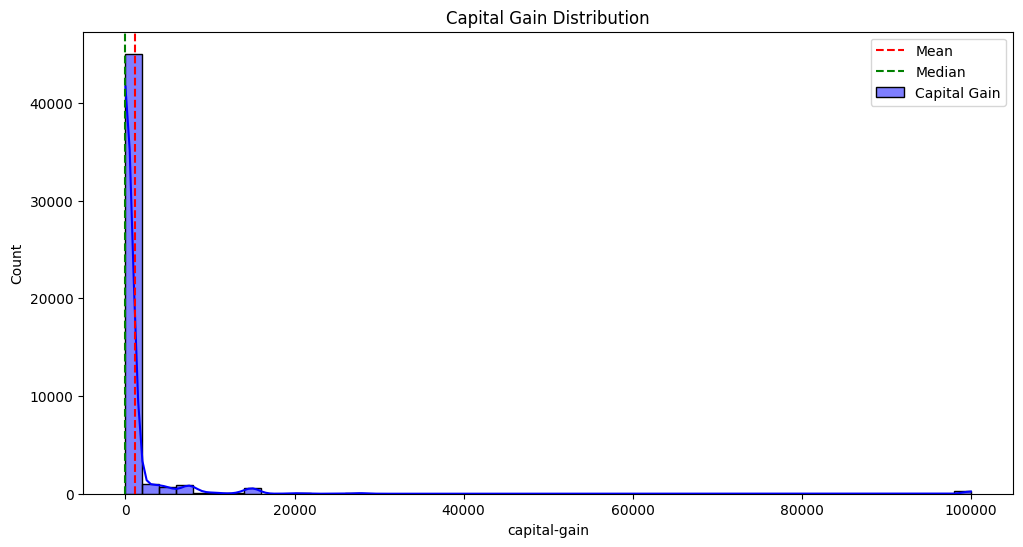

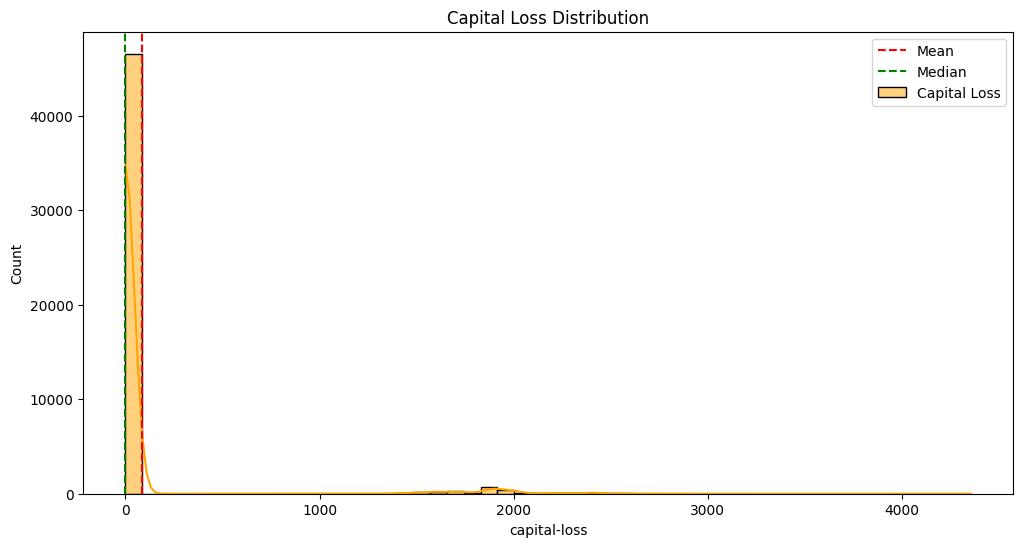

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution with descriptive statistics
plt.figure(figsize=(12, 6))
sns.histplot(X['capital-gain'], bins=50, kde=True, color='blue', label='Capital Gain')
plt.axvline(X['capital-gain'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(X['capital-gain'].median(), color='green', linestyle='dashed', label='Median')
plt.title('Capital Gain Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(X['capital-loss'], bins=50, kde=True, color='orange', label='Capital Loss')
plt.axvline(X['capital-loss'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(X['capital-loss'].median(), color='green', linestyle='dashed', label='Median')
plt.title('Capital Loss Distribution')
plt.legend()
plt.show()


Capital Gain: Typically, this variable has a lot of zero values, with a small number of high values.


Capital Loss: Similar to capital gain, this variable also tends to have many zero values with a few high values.



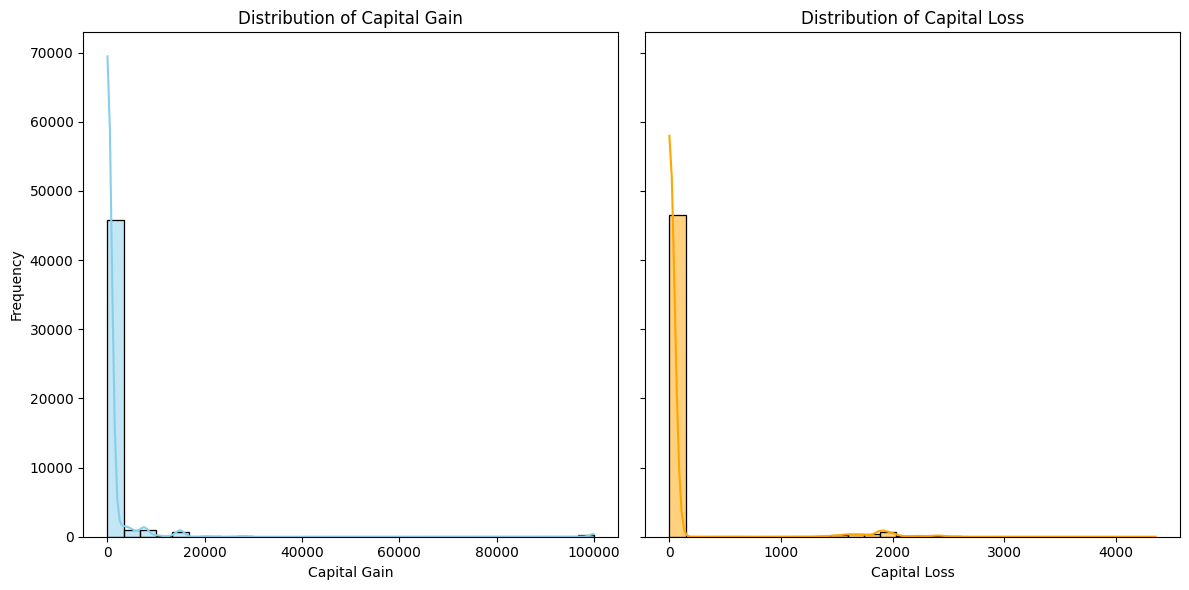

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns exist in the dataset
if 'capital-gain' in X.columns and 'capital-loss' in X.columns:
    # Set up the plotting space
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Plot capital_gain distribution
    sns.histplot(X['capital-gain'], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribution of Capital Gain')
    axes[0].set_xlabel('Capital Gain')
    axes[0].set_ylabel('Frequency')

    # Plot capital_loss distribution
    sns.histplot(X['capital-loss'], bins=30, kde=True, ax=axes[1], color='orange')
    axes[1].set_title('Distribution of Capital Loss')
    axes[1].set_xlabel('Capital Loss')

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'capital-gain' or 'capital-loss' not found in the dataset.")


In [112]:
import numpy as np

# Extract histogram data for capital_gain
gain_hist_counts, gain_hist_bins = np.histogram(X['capital-gain'], bins=30)

# Extract histogram data for capital_loss
loss_hist_counts, loss_hist_bins = np.histogram(X['capital-loss'], bins=30)

# Print the histogram data
print("Capital Gain Histogram Data:")
print("Counts:", gain_hist_counts)
print("Bins:", gain_hist_bins)

print("\nCapital Loss Histogram Data:")
print("Counts:", loss_hist_counts)
print("Bins:", loss_hist_bins)


Capital Gain Histogram Data:
Counts: [45799   935   974    95   656     2    50    20    58     0     6     0
     3     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0   244]
Bins: [    0.   3333.3  6666.6  9999.9 13333.2 16666.5 19999.8 23333.1 26666.4
 29999.7 33333.  36666.3 39999.6 43332.9 46666.2 49999.5 53332.8 56666.1
 59999.4 63332.7 66666.  69999.3 73332.6 76665.9 79999.2 83332.5 86665.8
 89999.1 93332.4 96665.7 99999. ]

Capital Loss Histogram Data:
Counts: [46560     6     8     0    21     2     8    15     6    64   257   385
   394   693    82   109   164    34     2    14     5     2     0     0
     0     6     2     0     0     3]
Bins: [   0.   145.2  290.4  435.6  580.8  726.   871.2 1016.4 1161.6 1306.8
 1452.  1597.2 1742.4 1887.6 2032.8 2178.  2323.2 2468.4 2613.6 2758.8
 2904.  3049.2 3194.4 3339.6 3484.8 3630.  3775.2 3920.4 4065.6 4210.8
 4356. ]


In [113]:
max_gain = X['capital-gain'].max()
max_loss = X['capital-loss'].max()

print(f"Maximum Gain is: {max_gain}")
print(f"Maximum Loss is: {max_loss}")

Maximum Gain is: 99999
Maximum Loss is: 4356


In [114]:
gain_mean = X['capital-gain'].mean()
gain_std = X['capital-gain'].std()
gain_threshold = gain_mean + 2 * gain_std  # Two standard deviations above the mean

loss_mean = X['capital-loss'].mean()
loss_std = X['capital-loss'].std()
loss_threshold = loss_mean + 2 * loss_std  # Two standard deviations above the mean

print(f"Capital Gain Threshold: {gain_threshold}")
print(f"Capital Loss Threshold: {loss_threshold}")


Capital Gain Threshold: 15983.10574153016
Capital Loss Threshold: 893.5114178314806


Capital-Gain Category Distribution:
capital-gain-category
No gain      44807
Low gain      3652
High gain      383
Name: count, dtype: int64

Capital-Loss Category Distribution:
capital-loss-category
No loss      46560
High loss     2237
Low loss        45
Name: count, dtype: int64


<ipython-input-115-c2b17c47c32e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='capital-gain-category', data=X, ax=axes[0], palette='Blues')
<ipython-input-115-c2b17c47c32e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='capital-loss-category', data=X, ax=axes[1], palette='Oranges')


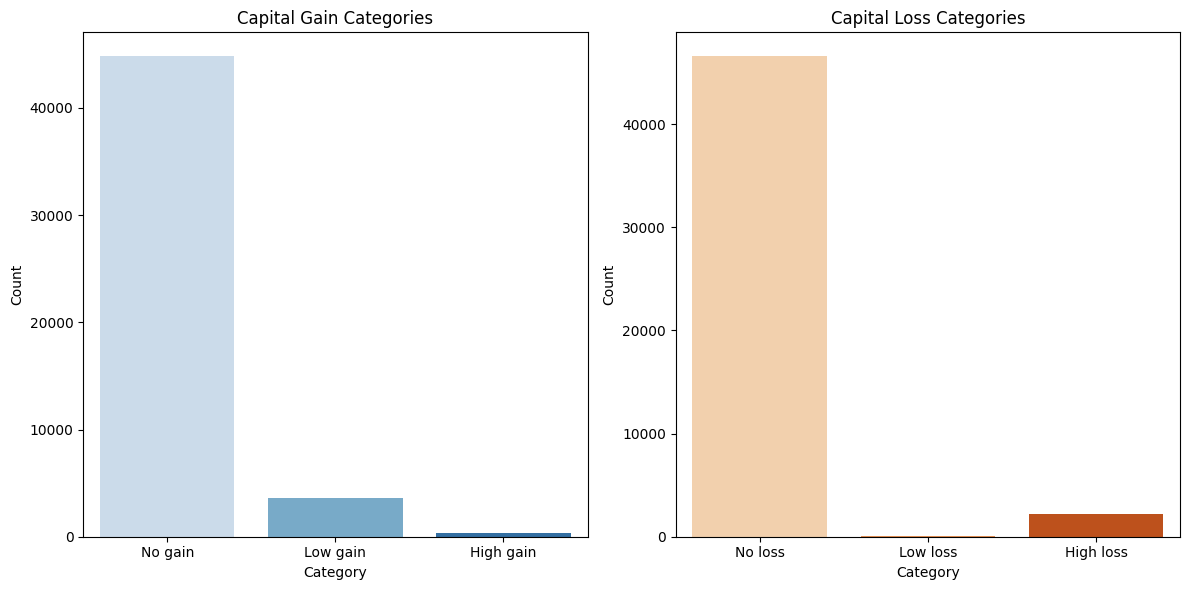

In [115]:
# Define thresholds for low and high gains/losses
gain_threshold = 16000
loss_threshold = 1000

# Transform `capital-gain` into categories
X['capital-gain-category'] = pd.cut(
    X['capital-gain'],
    bins=[-1, 0, gain_threshold, X['capital-gain'].max()],
    labels=['No gain', 'Low gain', 'High gain']
)

# Transform `capital-loss` into categories
X['capital-loss-category'] = pd.cut(
    X['capital-loss'],
    bins=[-1, 0, loss_threshold, X['capital-loss'].max()],
    labels=['No loss', 'Low loss', 'High loss']
)

# Check the distribution of the new categories
print("Capital-Gain Category Distribution:")
print(X['capital-gain-category'].value_counts())

print("\nCapital-Loss Category Distribution:")
print(X['capital-loss-category'].value_counts())

# Plot the distributions of the new categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='capital-gain-category', data=X, ax=axes[0], palette='Blues')
axes[0].set_title('Capital Gain Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

sns.countplot(x='capital-loss-category', data=X, ax=axes[1], palette='Oranges')
axes[1].set_title('Capital Loss Categories')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [116]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-gain-category,capital-loss-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Low gain,No loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No gain,No loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No gain,No loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No gain,No loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No gain,No loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No gain,No loss
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,No gain,No loss
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No gain,No loss
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,Low gain,No loss


*4 -	The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.*

*5 -	Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.*

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
Skewness: 1.4388918785218416
Kurtosis: 6.057848212464708


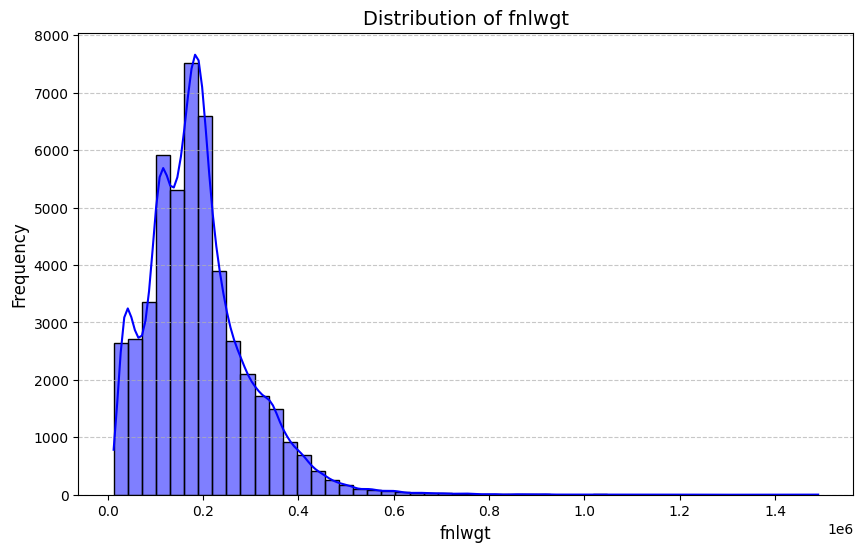

In [117]:
# Descriptive statistics for fnlwgt
fnlwgt_stats = X['fnlwgt'].describe()
print(fnlwgt_stats)

# Skewness and Kurtosis
skewness = X['fnlwgt'].skew()
kurtosis = X['fnlwgt'].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(X['fnlwgt'], bins=50, kde=True, color='blue')
plt.title('Distribution of fnlwgt', fontsize=14)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The skewness value of 1.44 suggests that the fnlwgt distribution is right-skewed, meaning there are a few very large values pulling the distribution to the right. This is corroborated by the kurtosis value of 6.06, indicating the presence of heavy tails or outliers.

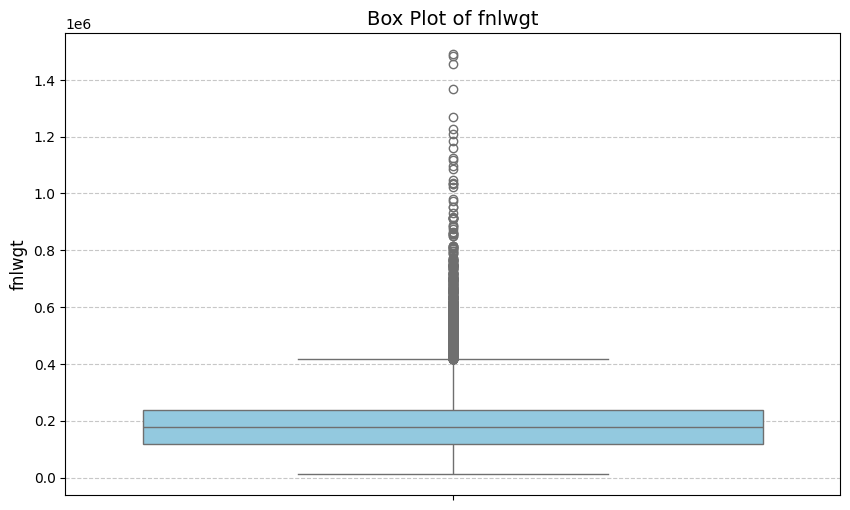

In [118]:
# Box plot for fnlwgt
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, y='fnlwgt', color='skyblue')
plt.title('Box Plot of fnlwgt', fontsize=14)
plt.ylabel('fnlwgt', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


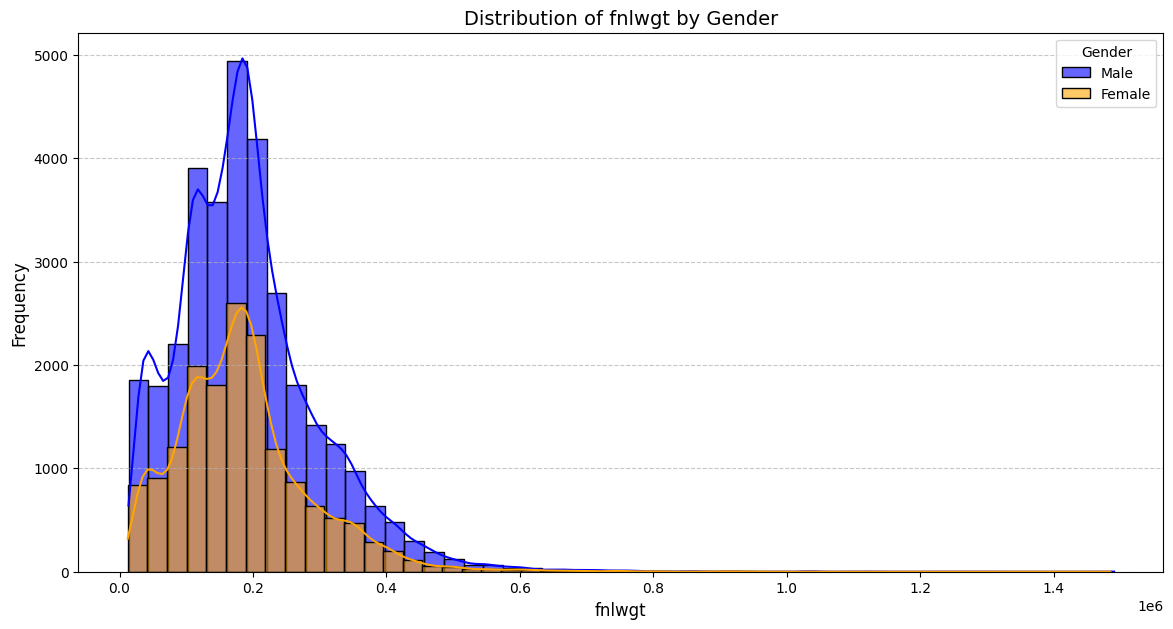

In [119]:
# Plot histograms for fnlwgt by gender
plt.figure(figsize=(14, 7))
genders = X['sex'].dropna().unique()  # Get unique genders
colors = ['blue', 'orange']  # Colors for male and female

for i, gender in enumerate(genders):
    sns.histplot(
        X[X['sex'] == gender]['fnlwgt'].dropna(),
        bins=50,
        kde=True,
        color=colors[i],
        label=gender,
        alpha=0.6
    )

plt.title('Distribution of fnlwgt by Gender', fontsize=14)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1.	Both distributions for men and women are right-skewed, consistent with the overall distribution of fnlwgt.
2.	The medians (represented by the middle lines in the boxplots) for fnlwgt are slightly different between men and women. This suggests there may be some central tendency differences between genders.
o	Both distributions show significant spread and the presence of outliers, as indicated by the whiskers and points outside the whiskers in the boxplots, where men tend to have a slightly wider range and more extreme outliers compared to women.


<ipython-input-120-cc981365cad7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='sex', y='fnlwgt', palette='Set2')


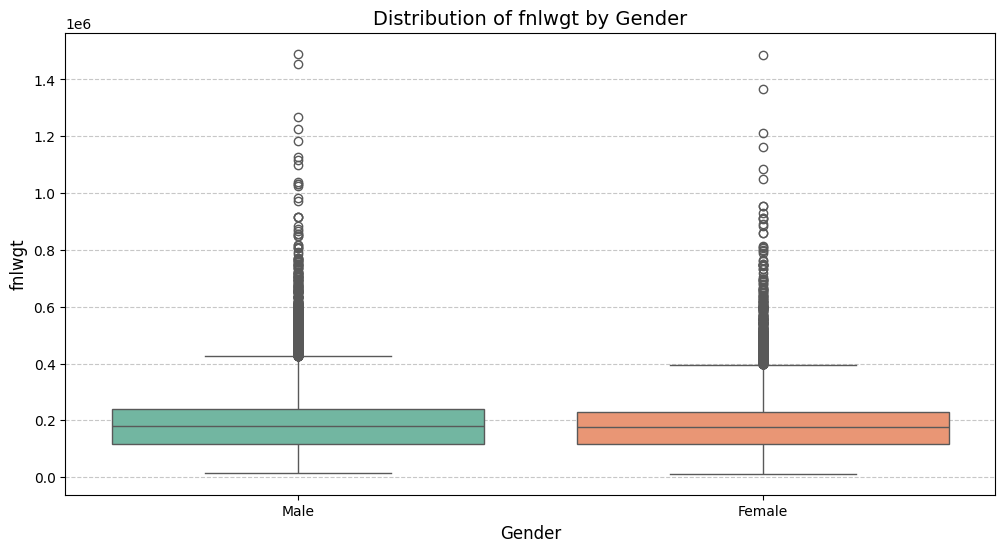

          count           mean            std      min       25%       50%  \
sex                                                                          
Female  16192.0  185504.471714  103217.151490  12285.0  116560.0  175572.0   
Male    32650.0  191727.021623  106709.380155  13492.0  117963.0  180138.0   

              75%        max  
sex                           
Female  228609.25  1484705.0  
Male    241722.50  1490400.0  


In [120]:
# Compare fnlwgt by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, x='sex', y='fnlwgt', palette='Set2')
plt.title('Distribution of fnlwgt by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('fnlwgt', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary statistics by gender
fnlwgt_gender = X.groupby('sex')['fnlwgt'].describe()
print(fnlwgt_gender)


Outliers and Extremes:

The maximum fnlwgt value is quite high for both genders, with females at 1,484,705 and males at 1,490,400, indicating some extreme values or outliers in the data.

In [121]:
# Calculate IQR for fnlwgt
Q1 = X['fnlwgt'].quantile(0.25)
Q3 = X['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Mark outliers as missing
X['fnlwgt'] = X['fnlwgt'].where((X['fnlwgt'] >= lower_bound) & (X['fnlwgt'] <= upper_bound), other=np.nan)

# Count missing values after marking outliers
outlier_count = X['fnlwgt'].isnull().sum()
print(f"Number of outliers marked as missing: {outlier_count}")


Lower Bound: -62586.75, Upper Bound: 417779.25
Number of outliers marked as missing: 1453


In [122]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-gain-category,capital-loss-category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Low gain,No loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No gain,No loss
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No gain,No loss
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No gain,No loss
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No gain,No loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No gain,No loss
48838,64,NaN,321403.0,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,No gain,No loss
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No gain,No loss
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,Low gain,No loss


count     47389.000000
mean     179687.725611
std       87634.191118
min       12285.000000
25%      115971.000000
50%      175808.000000
75%      229272.000000
max      417668.000000
Name: fnlwgt, dtype: float64
Skewness: 0.41779138601383164
Kurtosis: -0.2299203237482379


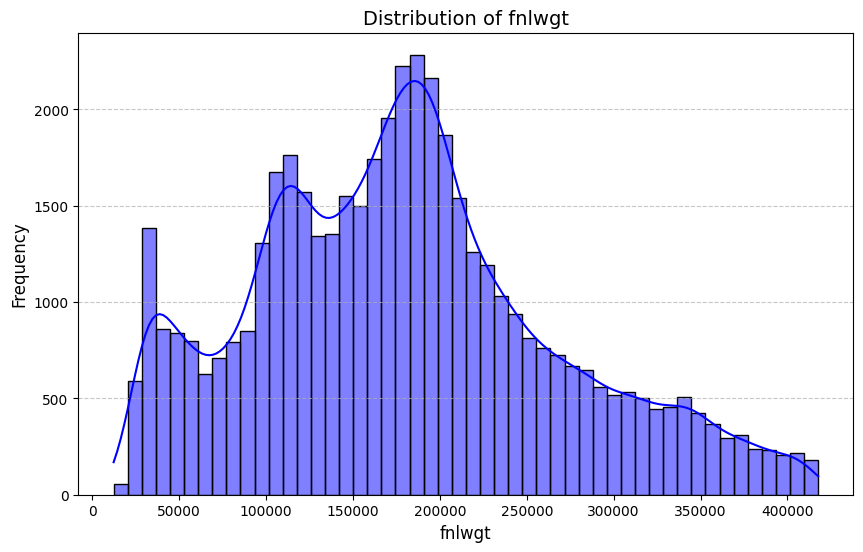

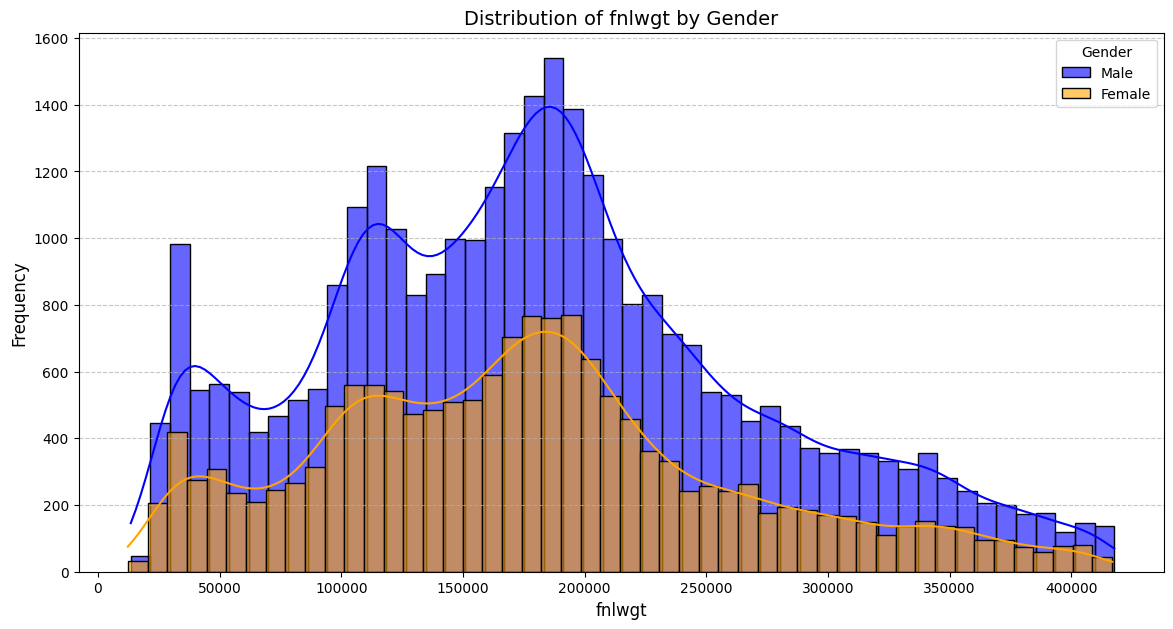

In [123]:
# Descriptive statistics for fnlwgt
fnlwgt_stats = X['fnlwgt'].describe()
print(fnlwgt_stats)

# Skewness and Kurtosis
skewness = X['fnlwgt'].skew()
kurtosis = X['fnlwgt'].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(X['fnlwgt'], bins=50, kde=True, color='blue')
plt.title('Distribution of fnlwgt', fontsize=14)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histograms for fnlwgt by gender
plt.figure(figsize=(14, 7))
genders = X['sex'].dropna().unique()  # Get unique genders
colors = ['blue', 'orange']  # Colors for male and female

for i, gender in enumerate(genders):
    sns.histplot(
        X[X['sex'] == gender]['fnlwgt'].dropna(),
        bins=50,
        kde=True,
        color=colors[i],
        label=gender,
        alpha=0.6
    )

plt.title('Distribution of fnlwgt by Gender', fontsize=14)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


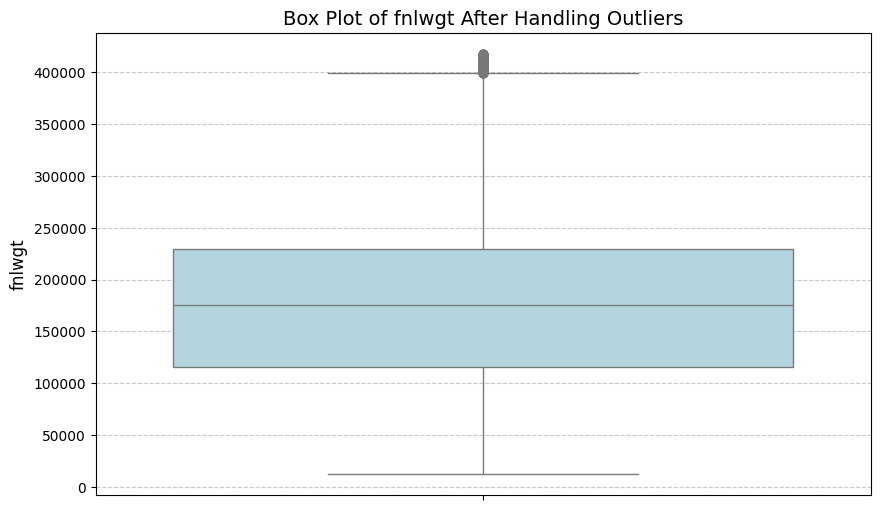

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, y='fnlwgt', color='lightblue')
plt.title('Box Plot of fnlwgt After Handling Outliers', fontsize=14)
plt.ylabel('fnlwgt', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Find the correlations between age, education-num and hours-per-week.*

*1 -	Do any of the variables appear to be correlated? How did you make your assessment?*

                     age  education-num  hours-per-week
age             1.000000       0.030940        0.071558
education-num   0.030940       1.000000        0.143689
hours-per-week  0.071558       0.143689        1.000000


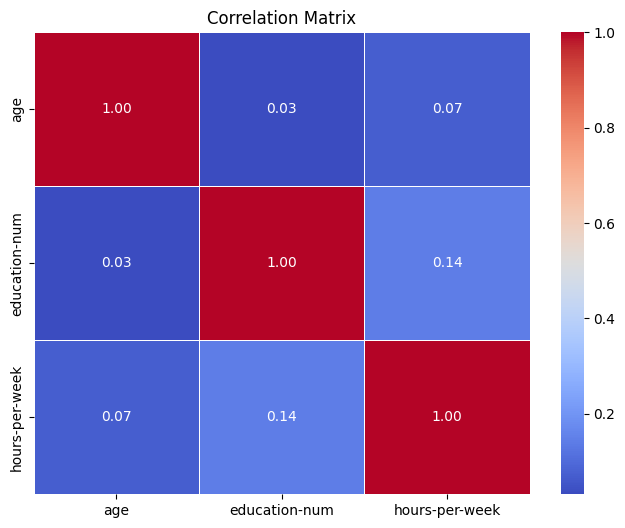

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation
correlation_columns = ['age', 'education-num', 'hours-per-week']

# Compute the correlation matrix
correlation_matrix = X[correlation_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


•	Hours-per-week correlation with Age (0.071558): Weak positive correlation suggesting minimal linear association.

•	Hours-per-week correlation with Education-num (0.143689): Weak positive relationship suggesting that individuals with more years of education tend to work slightly more hours per week.

•	Age correlation with Education-num (0.030940): Very weak positive correlation indicating that age has almost no linear relationship with the number of years of education.

The weak correlations between age, education level, and work hours suggest minimal linear associations among these variables in the dataset.


*Correlation 2: Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?*

In [126]:
import scipy.stats as stats

# Compute the correlation matrix
correlation_matrix = X[correlation_columns].corr()

# Iterate over the upper triangle of the correlation matrix to identify pairs with |correlation| > 0.1
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation_value = correlation_matrix.iloc[i, j]

        if abs(correlation_value) > 0.1:  # Only test pairs with correlation > |0.1|
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]

            # Compute Pearson's correlation and p-value
            corr, p_value = stats.pearsonr(X[var1], X[var2])

            # Report the result
            print(f"Correlation between {var1} and {var2}: {corr:.4f}")
            print(f"P-value: {p_value:.4f}")

            # Interpretation of the result
            if p_value < 0.05:
                significance = "significant"
            else:
                significance = "not significant"

            print(f"Result: The correlation is {significance} (p-value: {p_value:.4f})\n")


Correlation between hours-per-week and education-num: 0.1437
P-value: 0.0000
Result: The correlation is significant (p-value: 0.0000)



Since the p-value = 0.0000<0.05 is extremely low, we reject the null hypothesis, confirming that there is a statistically significant linear relationship between hours-per-week and education-num.

The positive, statistically significant correlation between hours-per-week and education-num (0.1437)> 0.1 supports the hypothesis that higher education levels are associated with longer working hours.

*Correlation 3*

In [127]:
# Split the dataset by gender (assuming 'gender' column exists with 'Male' and 'Female' as values)
male_data = X[X['sex'] == 'Male']
female_data = X[X['sex'] == 'Female']

# Compute Pearson correlation for males
corr_male, p_value_male = stats.pearsonr(male_data['education-num'], male_data['age'])

# Compute Pearson correlation for females
corr_female, p_value_female = stats.pearsonr(female_data['education-num'], female_data['age'])

# Report results
print(f"Male: Correlation between education-num and age: {corr_male:.4f}, p-value: {p_value_male:.4f}")
print(f"Female: Correlation between education-num and age: {corr_female:.4f}, p-value: {p_value_female:.4f}")

# Interpret significance
if p_value_male < 0.05:
    significance_male = "significant"
else:
    significance_male = "not significant"

if p_value_female < 0.05:
    significance_female = "significant"
else:
    significance_female = "not significant"

print(f"Male result: The correlation is {significance_male} (p-value: {p_value_male:.4f})")
print(f"Female result: The correlation is {significance_female} (p-value: {p_value_female:.4f})")


Male: Correlation between education-num and age: 0.0541, p-value: 0.0000
Female: Correlation between education-num and age: -0.0205, p-value: 0.0092
Male result: The correlation is significant (p-value: 0.0000)
Female result: The correlation is significant (p-value: 0.0092)


*Correlation 4*

Males:

•	Positive but Weak Relationship: The positive correlation (0.0541) suggests that as age increases, the education-num slightly increases for males, although the relationship is extremely weak. This could imply that older males might have slightly higher education levels, but the effect is minimal.

•	Significance: Despite the weak correlation, the significance P-value=0.0000 suggests that even this small relationship is consistent across the dataset.

Females:

•	Negative but Weak Relationship: The negative correlation (-0.0205) indicates that as age increases, the education-num slightly decreases for females, but again, the relationship is very weak. This might reflect historical trends where older female cohorts had fewer educational opportunities compared to younger cohorts.

•	Significance: The significant P-value =0.0092 indicates that this pattern is also consistent across the dataset, even though the effect size is small.

Both correlations are weak, indicating that age is not a strong predictor of education-num for either gender. The statistical significance in both cases indicates that these weak relationships are consistent across the dataset. The differing directions of the correlations point to potential historical and societal influences on education for men and women.
While these correlations are weak, they reflect the nuanced and evolving landscape of educational attainment over time, influenced by broader social trends and gender roles.



In [128]:
# Compute the covariance matrix for education-num and hours-per-week
covariance_matrix = X[['education-num', 'hours-per-week']].cov()

# Display the covariance matrix
print(covariance_matrix)


                education-num  hours-per-week
education-num        6.609901        4.577651
hours-per-week       4.577651      153.547885


Positive Covariance: The positive covariance between education-num and hours-per-week aligns with the positive correlation observed earlier (0.1437). Both metrics suggest that individuals with more years of education tend to work slightly more hours per week.


Magnitude of Variance: The variance in hours-per-week is significantly higher than in education-num, reflecting the greater spread of work hours compared to the more constrained variability in education years.

The covariance matrix complements the correlation analysis, reinforcing the positive relationship between education-num and hours-per-week. The positive covariance suggests that as education level increases, the number of hours worked per week also tends to increase, although the relationship is relatively weak.

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Ensure the target Y is binary (0 for <=50K, 1 for >50K)
y = y.applymap(lambda x: 1 if x == '>50K' else 0)
y.head()

# Step 2: Select features for the model (make sure Y aligns with X)
features = ['education-num', 'age', 'capital-gain-category', 'capital-loss-category', 'hours-per-week', 'sex', 'marital-status', 'occupation', 'race', 'workclass']

# Step 3: Preprocess categorical features using one-hot encoding
X_encoded = pd.get_dummies(X[features], drop_first=True)

# Step 4: Join X and Y dataframes to align them
X_encoded['income_binary'] = y

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('income_binary', axis=1), X_encoded['income_binary'], test_size=0.2, random_state=42)

# Step 6: Standardize the features (optional but recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 8: Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, you can examine the model's coefficients to understand feature importance
print("\nFeature Coefficients:")
coefficients = pd.DataFrame(model.coef_, X_encoded.drop('income_binary', axis=1).columns, columns=["Coefficient"])
#print(coefficients)
# Display the coefficients table nicely
coefficients.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'right')]}
])




<ipython-input-129-59d84b0187cc>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y = y.applymap(lambda x: 1 if x == '>50K' else 0)


Mean Squared Error: 0.10546539832058832
R-squared: 0.2148642487248169

Feature Coefficients:


,Coefficient
education-num,0.054923
age,0.018928
hours-per-week,0.022417
capital-gain-category_Low gain,0.042893
capital-gain-category_High gain,0.029799
capital-loss-category_Low loss,-0.001089
capital-loss-category_High loss,0.027810
sex_Male,0.010441
marital-status_Married-AF-spouse,0.006579
marital-status_Married-civ-spouse,0.097603
